# Visualizing Earnings Based On College Majors

In this project, we'll be working with a dataset on job outcomes of studentss who graduated from coleege between 2010 aand 2012. The original data on job outcomes was released by American Community Survey, FiveThirtyEight cleaned the dataset and released it on their Github repo.

Here are some columns in the dataset:
* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.

Our goal is to determine:
1. Do students in more popular majors make more money?
2. How many majors are predominantly male? Predominantly female?
3. Which category of majors have the most students?

## Understanding data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#check the column labels and a few rows to see how the data is structured
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
#Use dataframe.describe() to generate the summary statistics
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [5]:
#drop the rows containing missing values (one row)
recent_grads = recent_grads.dropna(axis=0)

## Scatter plots

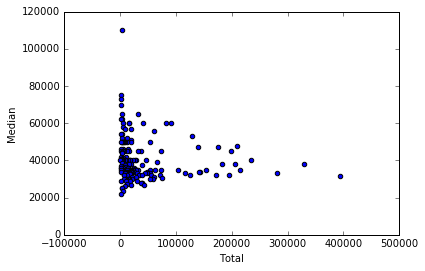

In [17]:
recent_grads.plot(x='Total', y='Median', kind='scatter')

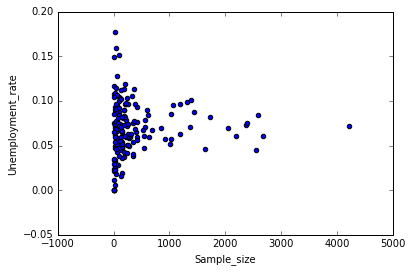

In [7]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

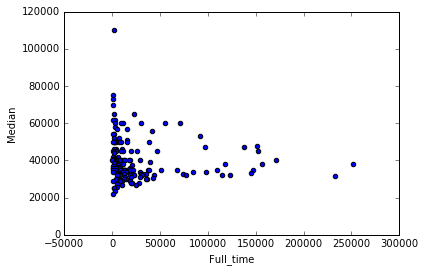

In [8]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

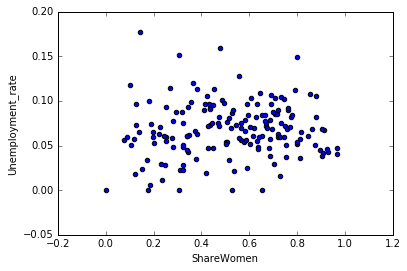

In [9]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

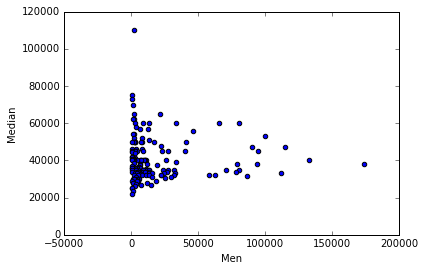

In [10]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

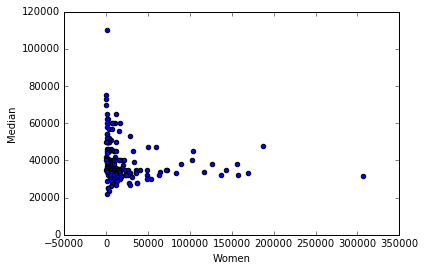

In [11]:
recent_grads.plot(x='Women', y='Median', kind='scatter')

## Histogram

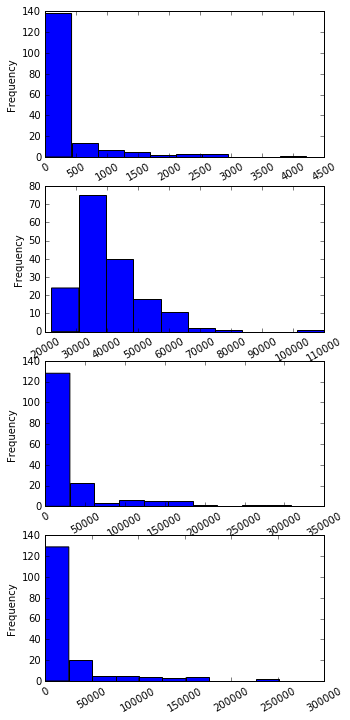

In [18]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(0,4):
    ax = fig.add_subplot(4,1,r+1)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=30)

cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(4,8):
    ax = fig.add_subplot(4,1,r-3)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=30)

## Scatter Matrix Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85991dc8d0>,
      dtype=object)

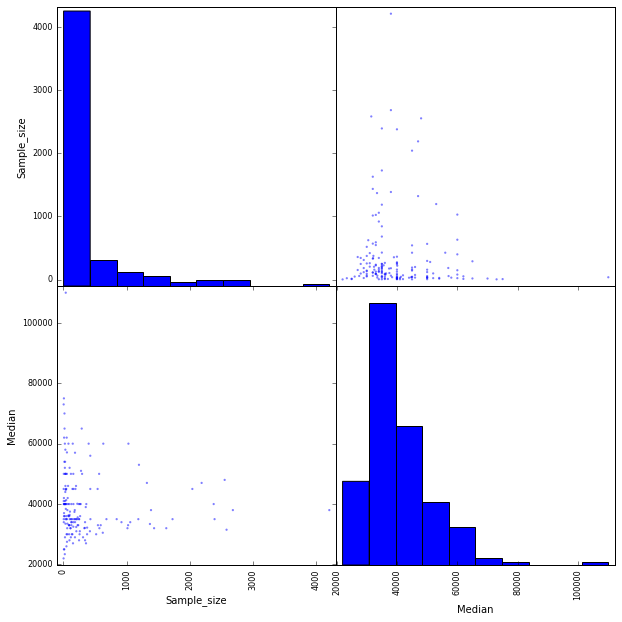

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8598ee6048>,
      dtype=object)

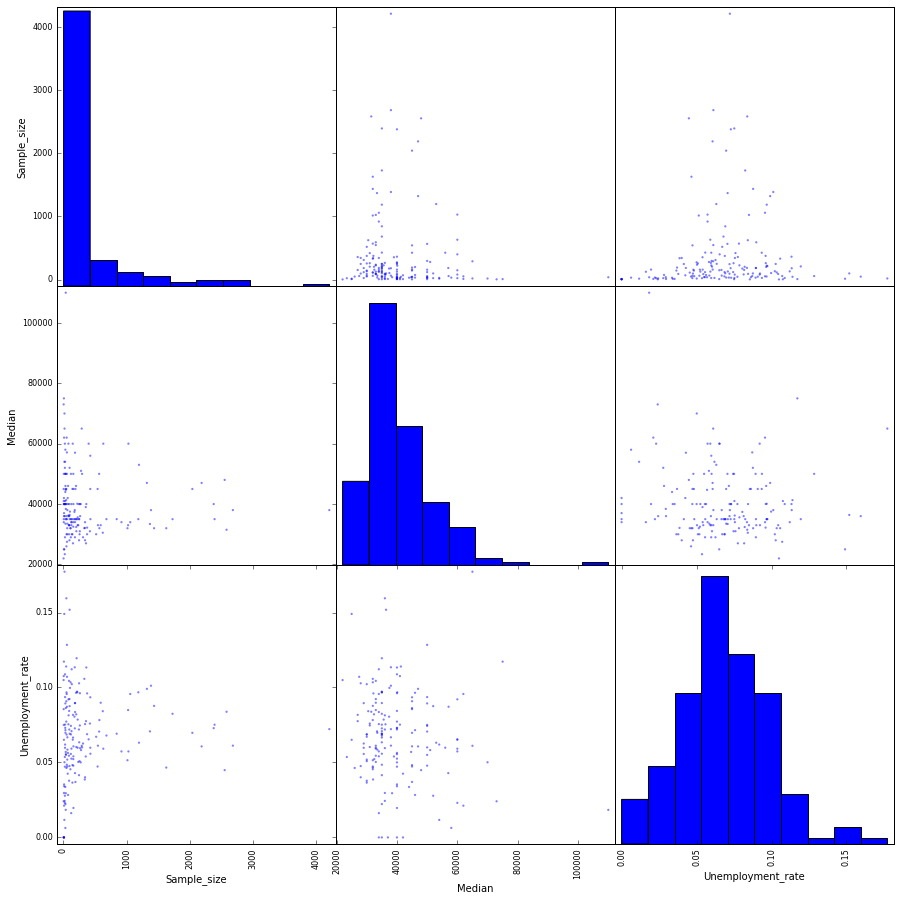

In [15]:
scatter_matrix(recent_grads[['Sample_size', 'Median','Unemployment_rate']], figsize=(15,15))

## Bar Plots

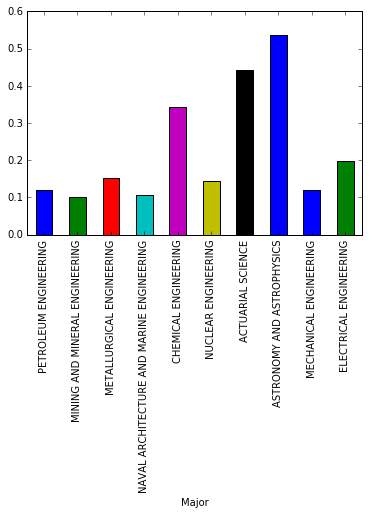

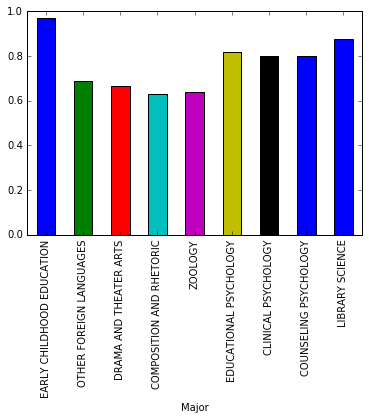

In [21]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)
plt.show()

#### Do students in more popular majors make more money?
Students in more popular majors actually made less money.

#### Do students that majored in subjects that were majority female make more money?
No, we can't see the relevance.

#### Is there any link between the number of full-time employees and median salary?
The more number of full-time emplyees, the less median salary.